# Histograms

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

(-0.5, 184.5, 259.5, -0.5)

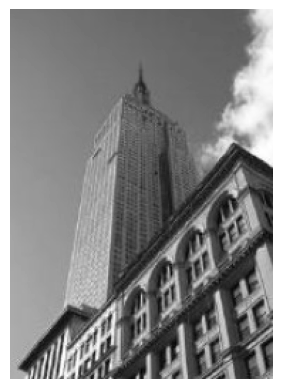

In [4]:
img_path = os.path.join('..', '..', 'pics', 'pic.jpg')
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')
plt.axis('off')

In [5]:
hist = cv.calcHist(images=img, channels=[0],mask=None, histSize=[256], ranges=[0, 256])

In [9]:
hist, bins = np.histogram(img.ravel(), bins=[256], range=[0, 256])

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   0.,
          1.,   2.,   5.,   7.,   9.,   7.,  14.,  12.,  13.,  25.,  19.,
         27.,  42.,  42.,  44.,  54.,  65.,  66.,  76.,  75.,  77.,  92.,
         95., 103., 118., 113., 134., 145., 138., 183., 165., 166., 213.,
        179., 167., 212., 172., 195., 177., 196., 186., 183., 202., 167.,
        172., 192., 166., 176., 166., 154., 164., 166., 168., 198., 173.,
        205., 200., 185., 183., 205., 194., 204., 217., 206., 225., 235.,
        217., 217., 211., 210., 228., 221., 208., 221., 245., 262., 219.,
        239., 239., 207., 236., 213., 233., 230., 213., 210., 208., 299.,
        353., 355., 409., 525., 389., 559., 573., 481., 459., 627., 525.,
        466., 439., 463., 485., 499., 526., 508., 453., 423., 336., 386.,
        372., 407., 371., 392., 369., 357., 371., 329., 319., 349., 350.,
        366., 325., 319., 308., 326., 321., 352., 352., 373., 356., 317.,
        326., 329., 370., 395., 345., 

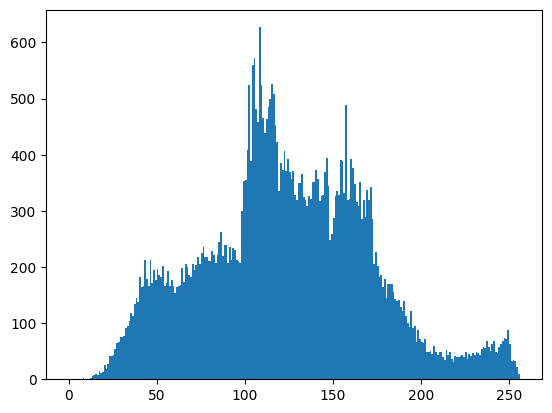

In [10]:
plt.hist(img.ravel(),256,[0,256])

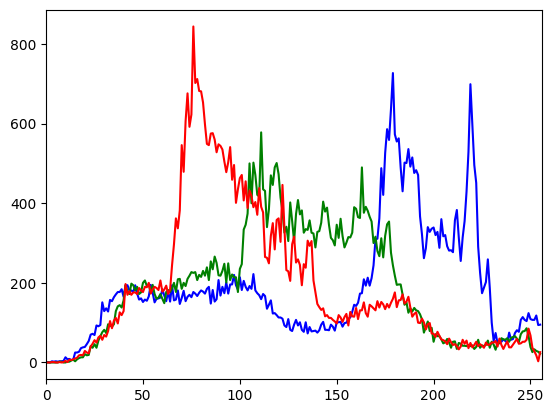

In [12]:
img = cv.imread(img_path)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

## Application of Mask

(0.0, 256.0)

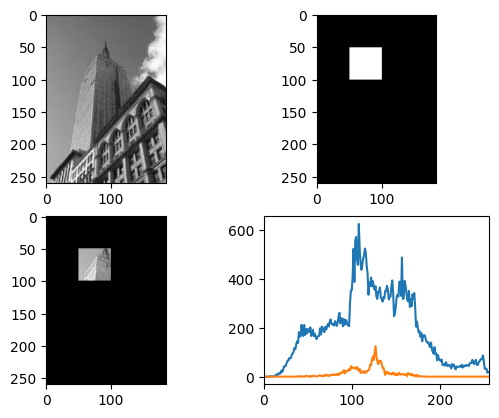

In [14]:
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
 
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[50:100, 50:100] = 255
masked_img = cv.bitwise_and(img, img, mask = mask)
 
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img], [0], None, [256], [0,256])
hist_mask = cv.calcHist([img], [0], mask, [256],[0,256])
 
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

## Equalization

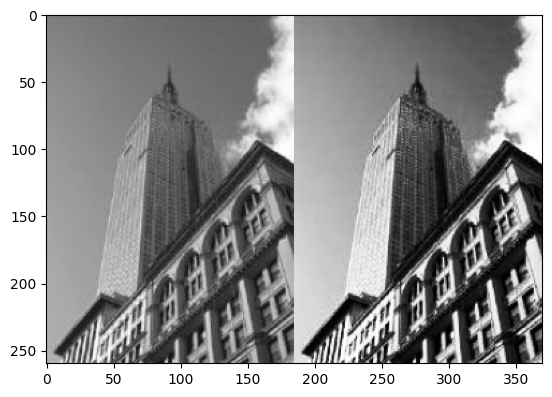

In [20]:
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(res, cmap='gray')

## Contrast Limited Adaptive Histogram Equalization

(-0.5, 369.5, 259.5, -0.5)

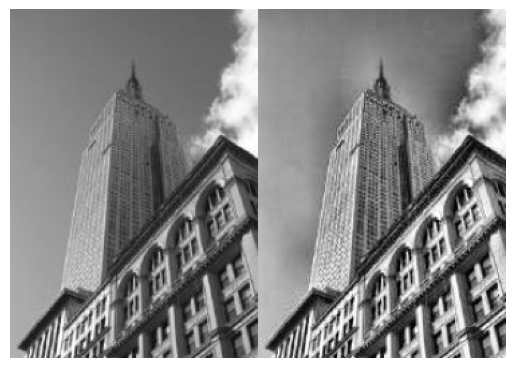

In [21]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
res = np.hstack((img, cl1)) 
plt.imshow(res, cmap='gray')
plt.axis('off')


## 2D Histogram 

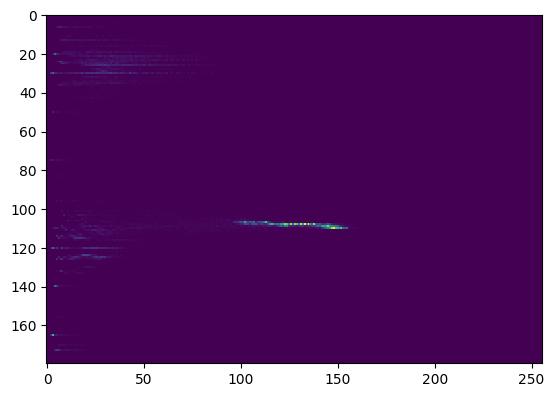

In [26]:
img_path = os.path.join('..', '..', 'pics', 'pic.jpg')
img = cv.imread(img_path)

hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
plt.imshow(hist,interpolation = 'nearest')

In [25]:
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV) 
hist, xbins, ybins = np.histogram2d(hsv.ravel(), hsv.ravel(),[180,256],[[0,180],[0,256]])

## Histogram Backprojection
It is used for image segmentation or finding objects of interest in an image. In simple words, it creates an image of the same size (but single channel) as that of our input image, where each pixel corresponds to the probability of that pixel belonging to our object.  

### Numpy

In [29]:
#roi is the object or region of object we need to find
roi = img[50:100, 50:100]
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
 
target = img.copy()
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
 
# Find the histograms using calcHist. Can be done with np.histogram2d also
M = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
I = cv.calcHist([hsvt],[0, 1], None, [180, 256], [0, 180, 0, 256] )

In [31]:
h,s,v = cv.split(hsvt)
R = M/I
B = R[h.ravel(),s.ravel()]
B = np.minimum(B,1)
B = B.reshape(hsvt.shape[:2])

C:\Users\Matebook 14S\AppData\Local\Temp\ipykernel_27396\1773689750.py:2: RuntimeWarning: invalid value encountered in divide
  R = M/I


In [34]:
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(B,-1,disc,B)
B = np.uint8(B)
cv.normalize(B,B,0,255,cv.NORM_MINMAX)

array([[16, 16, 16, ...,  0,  0,  0],
       [16, 16, 16, ...,  0,  0,  0],
       [32, 32, 32, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [35]:
ret,thresh = cv.threshold(B,50,255,0)

### OpenCV

(-0.5, 554.5, 259.5, -0.5)

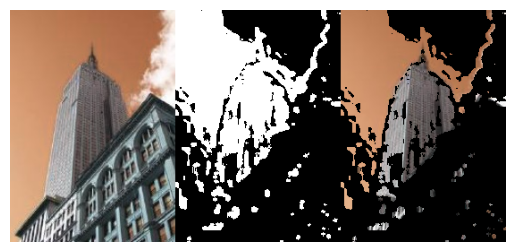

In [38]:
roi = img[50:100, 50:100]
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
 
target = img.copy()
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
 
# calculating object histogram
roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
 
# normalize histogram and apply backprojection
cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)
dst = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
 
# Now convolute with circular disc
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(dst,-1,disc,dst)
 
# threshold and binary AND
ret,thresh = cv.threshold(dst,50,255,0)
thresh = cv.merge((thresh,thresh,thresh))
res = cv.bitwise_and(target,thresh)
 
res = np.hstack((target,thresh,res))
plt.imshow(res)
plt.axis('off')